## Without data preprocessing

### Import the libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

### Load the dataset

In [3]:
data = pd.read_csv('KDDCup99.csv')

In [4]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


### Model Creation

In [5]:
data.drop("protocol_type", axis=1, inplace=True)
data.drop("service", axis=1, inplace=True)
data.drop("flag", axis=1, inplace=True)
data.dropna(subset = ["label"], inplace=True)
target_column = data["label"]

# Define a dictionary mapping string labels to integers
class_mapping = {'normal':1,'buffer_overflow':2,'loadmodule':3,'perl':4,'neptune':5,'smurf':6,
    'guess_passwd':7,'pod':8,'teardrop':9,'portsweep':10,'ipsweep':11,'land':12,'ftp_write':13,
    'back':14,'imap':15,'satan':16,'phf':17,'nmap':18,'multihop':19,'warezmaster':20,'warezclient':21,
    'spy':22,'rootkit':23}
# Convert the target column to integer type
data["label"] = data["label"].map(class_mapping).astype(int)

# Separate features and target
features = data.drop('label', axis=1)
target = data['label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Different Model with Evalaution Metrics and Visualization

In [21]:
model=LogisticRegression(random_state=0)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [22]:
# Calculate accuracy and confusion matrix
conf_matrix = confusion_matrix(model.predict(X_train), y_train)
accuracy = accuracy_score(model.predict(X_train), y_train)
precision = precision_score(model.predict(X_train), y_train, average='weighted')
recall = recall_score(model.predict(X_train), y_train, average='weighted')
f1 = f1_score(model.predict(X_train), y_train,average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[8277    1    1    1    0    2]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   6    0    0    0    2 2912]]

Accuracy: 0.9988394929476879
Precision: 0.9992855388613138
Recall: 0.9988394929476879
F1 Score: 0.9990622379714248


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Train the model
model1 = GaussianNB().fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='weighted')
recall1 = recall_score(y_test, y_pred, average='weighted')
f11 = f1_score(y_test, y_pred, average='weighted')

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)

Confusion Matrix:
[[2016    0    3]
 [   1    0    0]
 [   1    0  780]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2019
           2       0.00      0.00      0.00         1
           6       1.00      1.00      1.00       781

    accuracy                           1.00      2801
   macro avg       0.67      0.67      0.67      2801
weighted avg       1.00      1.00      1.00      2801


Accuracy: 0.9982149232416994
Precision: 0.9978602898089867
Recall: 0.9982149232416994
F1 Score: 0.9980371075590933


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [25]:
# Initialize the classifier with random_state=0
mlp1 = MLPClassifier(random_state=0)
# Fit the classifier to the training data
mlp1.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [33]:
accuracy2 = accuracy_score(mlp1.predict(X_train), y_train)
print("Accuracy:",accuracy2)
y_pred = mlp1.predict(X_test)
precision2 = precision_score(y_test, y_pred, average='weighted')
recall2 = recall_score(y_test, y_pred, average='weighted')
f12 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)

Accuracy: 0.9998214604534904
Precision: 0.9992859692966798
Recall: 0.9992859692966798
F1-score: 0.9992859692966798


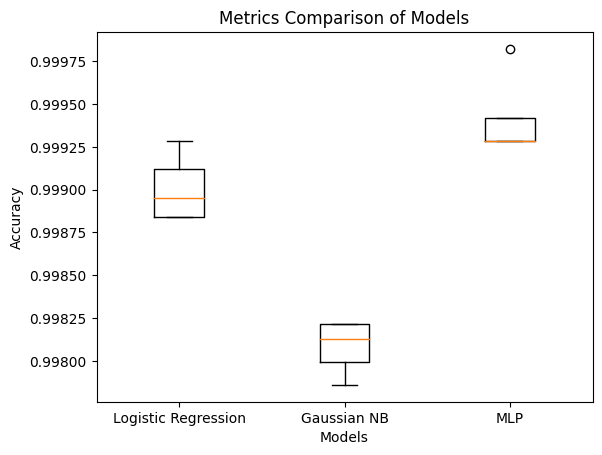

In [34]:
# Visualize accuracy scores
models = ['Logistic Regression', 'Gaussian NB', 'MLP']
accuracies = [
    [accuracy, precision, recall, f1],  # Logistic Regression accuracies
    [accuracy1, precision1, recall1, f11],  # Gaussian NB accuracies
    [accuracy2, precision2, recall2, f12]   # MLP accuracies
]
plt.boxplot(accuracies, labels=models)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Metrics Comparison of Models')
# Display the plot
plt.show()

### Features contributing to the model

In [13]:
print("Features contributing to the model:")
for i, class_label in enumerate(model.classes_):
    print(f"\nClass: {class_label}")
    print("Means:")
    class_means = X_train[y_train == class_label].mean().sort_values(ascending=False)
    print(class_means)  # Mean for each feature in this class
    print("Variances:")
    class_variances = X_train[y_train == class_label].var().sort_values(ascending=False)
    print(class_variances)  # Variance for each feature in this class

Features contributing to the model:

Class: 1
Means:
dst_bytes                      4064.599541
src_bytes                       345.020765
dst_host_srv_count              237.686828
dst_host_count                  124.694555
srv_count                        11.756368
count                             9.218278
duration                          1.707956
same_srv_rate                     0.997110
dst_host_same_srv_rate            0.971246
logged_in                         0.965592
srv_diff_host_rate                0.125147
dst_host_same_src_port_rate       0.067313
hot                               0.047326
dst_host_srv_diff_host_rate       0.022091
dst_host_diff_srv_rate            0.006011
diff_srv_rate                     0.005298
is_guest_login                    0.003622
lnum_access_files                 0.001569
dst_host_serror_rate              0.001307
dst_host_rerror_rate              0.001096
dst_host_srv_rerror_rate          0.001087
rerror_rate                       0.001087
s

### Ablation Analysis

In [14]:
# Perform ablation analysis
removed_features = []
scores = []

for feature in features.columns:
    # Remove the current feature
    reduced_features = features.drop(feature, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(reduced_features, target, test_size=0.2, random_state=42)

    # Train a new model without the feature
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Evaluate the model without the feature
    score = accuracy_score(y_test, model.predict(X_test))
    scores.append(score)

    # Store the removed feature
    removed_features.append(feature)

# Create a dataframe with results
results_df = pd.DataFrame({"Feature Removed": removed_features, "Accuracy Score": scores})

# Print the results
print("Ablation Analysis Results:")
print(results_df.to_string())

# Compare the original and reduced model performance
print("Reduced Model Accuracy Range:", min(scores), "-", max(scores))

Ablation Analysis Results:
                Feature Removed  Accuracy Score
0                      duration        0.998215
1                     src_bytes        0.997501
2                     dst_bytes        0.998572
3                          land        0.997858
4                wrong_fragment        0.997858
5                        urgent        0.997858
6                           hot        0.998215
7             num_failed_logins        0.997858
8                     logged_in        0.998215
9              lnum_compromised        0.997858
10                  lroot_shell        0.997858
11                lsu_attempted        0.997858
12                    lnum_root        0.997858
13          lnum_file_creations        0.997858
14                  lnum_shells        0.997858
15            lnum_access_files        0.997858
16           lnum_outbound_cmds        0.997858
17                is_host_login        0.997858
18               is_guest_login        0.997858
19           

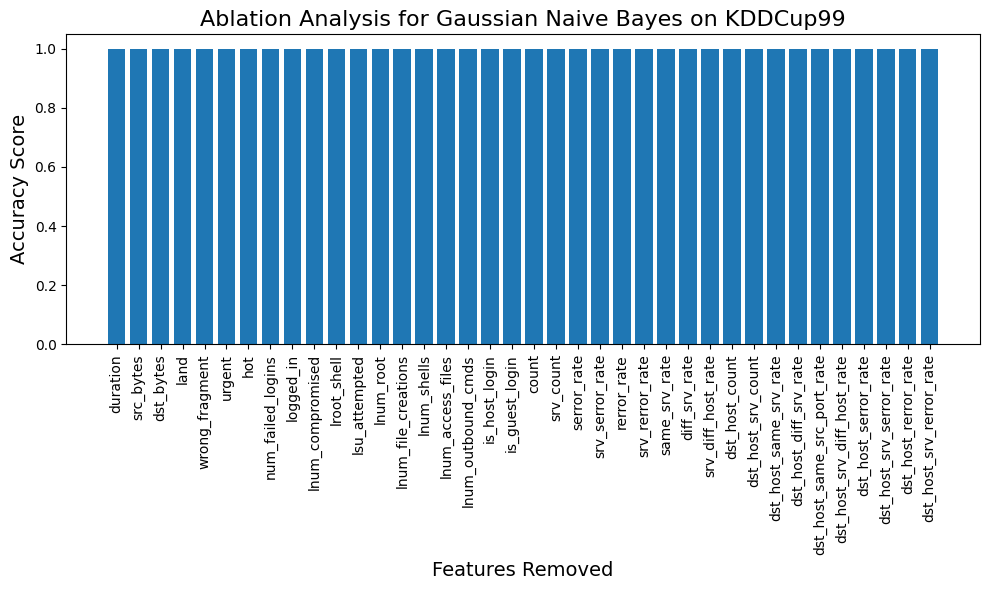

In [15]:
# Prepare data
features = results_df["Feature Removed"]
scores = results_df["Accuracy Score"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)

# Add labels and title
plt.xlabel("Features Removed", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.title("Ablation Analysis for Gaussian Naive Bayes on KDDCup99", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

## With data preprocessing

### Import the libraries

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

### Load the dataset

In [38]:
df = pd.read_csv("KDDCup99.csv")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


### Model Creation

In [39]:
# Define a dictionary mapping string labels to integers
class_mapping = {'normal':1,'buffer_overflow':2,'loadmodule':3,'perl':4,'neptune':5,'smurf':6,
    'guess_passwd':7,'pod':8,'teardrop':9,'portsweep':10,'ipsweep':11,'land':12,'ftp_write':13,
    'back':14,'imap':15,'satan':16,'phf':17,'nmap':18,'multihop':19,'warezmaster':20,'warezclient':21,
    'spy':22,'rootkit':23}
# Convert the target column to integer type
df["label"] = df["label"].map(class_mapping).astype(int)

object_columns = df.select_dtypes(include="object").columns
# Initialize a dictionary to store mappings
class_mapping = {}
# Iterate through object-type columns
for column in object_columns:
    # Create a mapping for each unique value in the column
    unique_values = df[column].unique()
    class_mapping[column] = {value: i + 1 for i, value in enumerate(unique_values)}
# Apply the mapping to the DataFrame
for column, mapping_dict in class_mapping.items():
    df[column] = df[column].map(mapping_dict).astype(int)

# Select object-type columns
object_columns = df.select_dtypes(include="object").columns

# Impute missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Separate features and target
features = df.drop("label", axis=1)
target = df["label"]

# Normalize features
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

### Different Model with Evalaution Metrics and Visualization

In [40]:
model=LogisticRegression(random_state=0)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [41]:
# Calculate accuracy and confusion matrix
conf_matrix = confusion_matrix(model.predict(X_train), y_train)
accuracy = accuracy_score(model.predict(X_train), y_train)
precision = precision_score(model.predict(X_train), y_train, average='weighted')
recall = recall_score(model.predict(X_train), y_train, average='weighted')
f1 = f1_score(model.predict(X_train), y_train,average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[ 64402     21      6      3      2     69     46    188      0     67
     624      0      7   1388      1      2      4     39      1      2
     756      2      2]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0]
 [ 12570      0      0      0  85579      5      0      0    787    755
      69      3      0      0      1   1263      0     89      1      1
      29      0      5]
 [   638      0      0      0      9 224698      0      0      0      1
     277     11      0      0      6      0      0     59      0      

In [42]:
# Train the model
model1 = GaussianNB().fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [43]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy1= accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='weighted')
recall1 = recall_score(y_test, y_pred, average='weighted')
f11 = f1_score(y_test, y_pred, average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[15996     0     0  3232   179     0     0     0    36     0     0     0
      9     0     0     0     0     0     4     0]
 [    9     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    3     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    2     0     0 21607     2     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [   18     0     0     3 55997     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    7     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [   56     0     0     0     0     0     0     0     1     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0   192     0     0     0     0     0     0     0     0
      0     0     0     0     0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.96      0.82      0.88     19456
         2.0       0.00      0.00      0.00         9
         3.0       0.00      0.00      0.00         3
         5.0       0.84      1.00      0.92     21611
         6.0       0.99      1.00      1.00     56018
         7.0       0.00      0.00      0.00         7
         8.0       0.00      0.00      0.00        57
         9.0       0.00      0.00      0.00       192
        10.0       0.00      0.00      0.00       216
        11.0       0.00      0.00      0.00       277
        12.0       0.00      0.00      0.00         7
        13.0       0.00      0.00      0.00         1
        14.0       0.92      0.26      0.40       391
        15.0       0.00      0.00      0.00         4
        16.0       0.00      0.00      0.00       324
        18.0       0.00      0.00      0.00        44
        19.0       0.00      0.00      0.00         2
        20.0       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# Initialize the classifier with random_state=0
mlp1 = MLPClassifier(random_state=0)
# Fit the classifier to the training data
mlp1.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [45]:
accuracy2 = accuracy_score(mlp1.predict(X_train), y_train)
print("Accuracy:",accuracy2)
y_pred = mlp1.predict(X_test)
precision2 = precision_score(y_test, y_pred, average='weighted')
recall2 = recall_score(y_test, y_pred, average='weighted')
f12 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)

Accuracy: 0.9957618112627019
Precision: 0.9960307921125775
Recall: 0.9958098862394235
F1-score: 0.9957138737638201


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


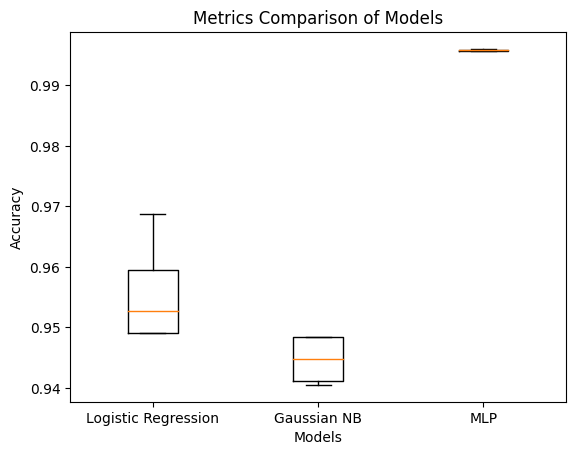

In [46]:
# Visualize accuracy scores
models = ['Logistic Regression', 'Gaussian NB', 'MLP']
accuracies = [
    [accuracy, precision, recall, f1],  # Logistic Regression accuracies
    [accuracy1, precision1, recall1, f11],  # Gaussian NB accuracies
    [accuracy2, precision2, recall2, f12]   # MLP accuracies
]
import matplotlib.pyplot as plt
plt.boxplot(accuracies, labels=models)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Metrics Comparison of Models')
# Display the plot
plt.show()

### Feature Contribute to the model

In [47]:
print("Features contributing to the model:")
for i, class_label in enumerate(model.classes_):
    print(f"\nClass: {class_label}")
    print("Means:")
    class_means = X_train[y_train == class_label].mean().sort_values(ascending=False)
    print(class_means)  # Mean for each feature in this class
    print("Variances:")
    class_variances = X_train[y_train == class_label].var().sort_values(ascending=False)
    print(class_variances)  # Variance for each feature in this class

Features contributing to the model:

Class: 1.0
Means:
dst_bytes                      3392.041210
src_bytes                      1229.351011
duration                        217.109392
dst_host_srv_count              202.081019
dst_host_count                  148.402796
srv_count                        10.877527
count                             8.120687
service                           3.730278
protocol_type                     1.223089
flag                              1.119646
same_srv_rate                     0.985418
dst_host_same_srv_rate            0.845215
logged_in                         0.719549
dst_host_same_src_port_rate       0.134185
srv_diff_host_rate                0.133951
lnum_root                         0.058313
dst_host_rerror_rate              0.057673
dst_host_diff_srv_rate            0.056464
srv_rerror_rate                   0.056066
rerror_rate                       0.055875
dst_host_srv_rerror_rate          0.055745
hot                               0.044500

### Ablation Analysis

In [48]:
# Perform ablation analysis
removed_features = []
scores = []

for feature in features.columns:
    # Remove the current feature
    reduced_features = features.drop(feature, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(reduced_features, target, test_size=0.2, random_state=42)

    # Train a new model without the feature
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Evaluate the model without the feature
    score = accuracy_score(y_test, model.predict(X_test))
    scores.append(score)

    # Store the removed feature
    removed_features.append(feature)

# Create a dataframe with results
results_df = pd.DataFrame({"Feature Removed": removed_features, "Accuracy Score": scores})

# Print the results
print("Ablation Analysis Results:")
print(results_df.to_string())

# Compare the original and reduced model performance
print("Reduced Model Accuracy Range:", min(scores), "-", max(scores))

Ablation Analysis Results:
                Feature Removed  Accuracy Score
0                      duration        0.945984
1                 protocol_type        0.946773
2                       service        0.946804
3                          flag        0.946723
4                     src_bytes        0.937604
5                     dst_bytes        0.929851
6                          land        0.946773
7                wrong_fragment        0.946773
8                        urgent        0.946773
9                           hot        0.946713
10            num_failed_logins        0.946773
11                    logged_in        0.946773
12             lnum_compromised        0.946773
13                  lroot_shell        0.946773
14                lsu_attempted        0.946773
15                    lnum_root        0.946773
16          lnum_file_creations        0.946773
17                  lnum_shells        0.946773
18            lnum_access_files        0.946773
19           

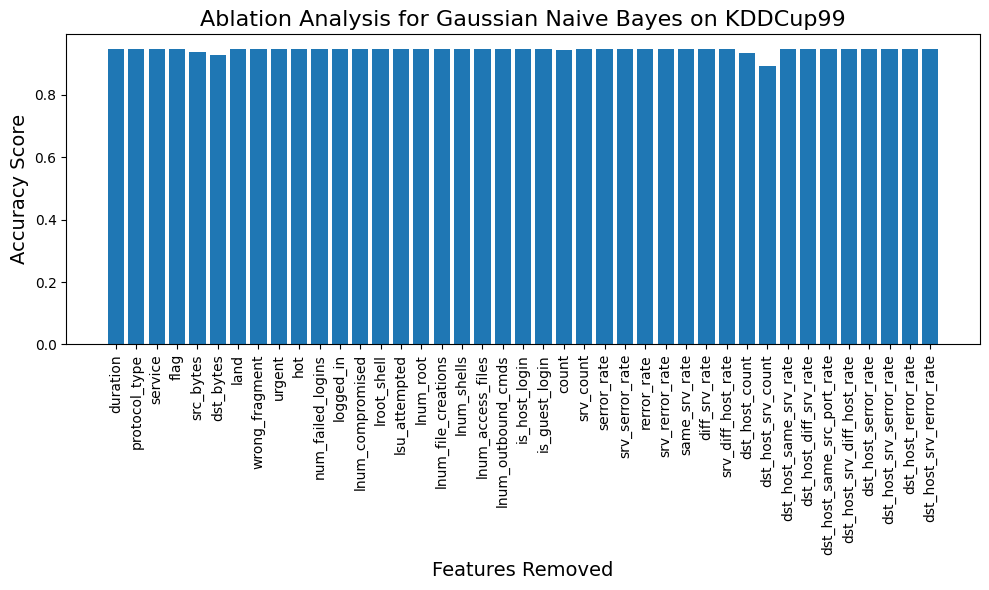

In [49]:
# Prepare data
features = results_df["Feature Removed"]
scores = results_df["Accuracy Score"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)

# Add labels and title
plt.xlabel("Features Removed", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.title("Ablation Analysis for Gaussian Naive Bayes on KDDCup99", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()